In [19]:
import pandas as pd
import numpy as np

In [20]:
geo_data = pd.read_csv('geoMapv.csv', skiprows=3, header=None)
year_data = pd.read_csv('multiTimelinev.csv', skiprows=3, header=None)
geo_data.columns = ['Region', 'Trend']
year_data.columns = ['Date', 'Trend']

In [21]:
print(geo_data.head())
print(year_data.head())

                      Region  Trend
0  Івано-Франківська область  100.0
1         Рівненська область   99.0
2          Вінницька область   92.0
3          Черкаська область   91.0
4       Закарпатська область   90.0
         Date  Trend
0  2023-11-12     38
1  2023-11-19     34
2  2023-11-26     37
3  2023-12-03     34
4  2023-12-10     47


Описова статистика

- середнє значення

In [22]:
mean_trend_geo = geo_data['Trend'].mean()

print("Середнє значення тренду для всіх регіонів:", mean_trend_geo)

Середнє значення тренду для всіх регіонів: 76.70833333333333


Вище за середнє - за 50, тобто ми можемо стверджувати про актуальність тренду.

- медіана

In [23]:
median_trend_geo = geo_data['Trend'].median()
print("Медіана тренду для всіх регіонів:", median_trend_geo)

Медіана тренду для всіх регіонів: 80.0


Досить високий інтерес.

- стандартне відхилення

In [24]:
std_trend_geo = geo_data['Trend'].std()
print("Стандартне відхилення тренду для всіх регіонів:", std_trend_geo)

Стандартне відхилення тренду для всіх регіонів: 16.174266105699232


Високе стандартне відхилення - стабільно розподільно тренд по регіонам.

- мін та макс

In [25]:
min_trend_geo = geo_data['Trend'].min()
max_trend_geo = geo_data['Trend'].max()
print(f"Мінімум {min_trend_geo} та максимум {max_trend_geo}.")

Мінімум 42.0 та максимум 100.0.


- мода

In [26]:
mode_trend_geo = geo_data['Trend'].mode()
print("Мода тренду для всіх регіонів:", mode_trend_geo.values)

Мода тренду для всіх регіонів: [90.]


In [27]:
var_trend_geo = geo_data['Trend'].var()
print("Дисперсія тренду для всіх регіонів:", var_trend_geo)

Дисперсія тренду для всіх регіонів: 261.606884057971


In [28]:
geo_data['Normalized'] = (geo_data['Trend'] - geo_data['Trend'].min()) / (geo_data['Trend'].max() - geo_data['Trend'].min())

In [29]:
geo_data['Normalized'].var()

np.float64(0.07776661238346344)

In [30]:
geo_data['Normalized'].std()

np.float64(0.27886665699481433)

In [31]:
Висновок: дивлячись на наші результати можна зробити висновок що запит актуальний

SyntaxError: invalid syntax (222438813.py, line 1)

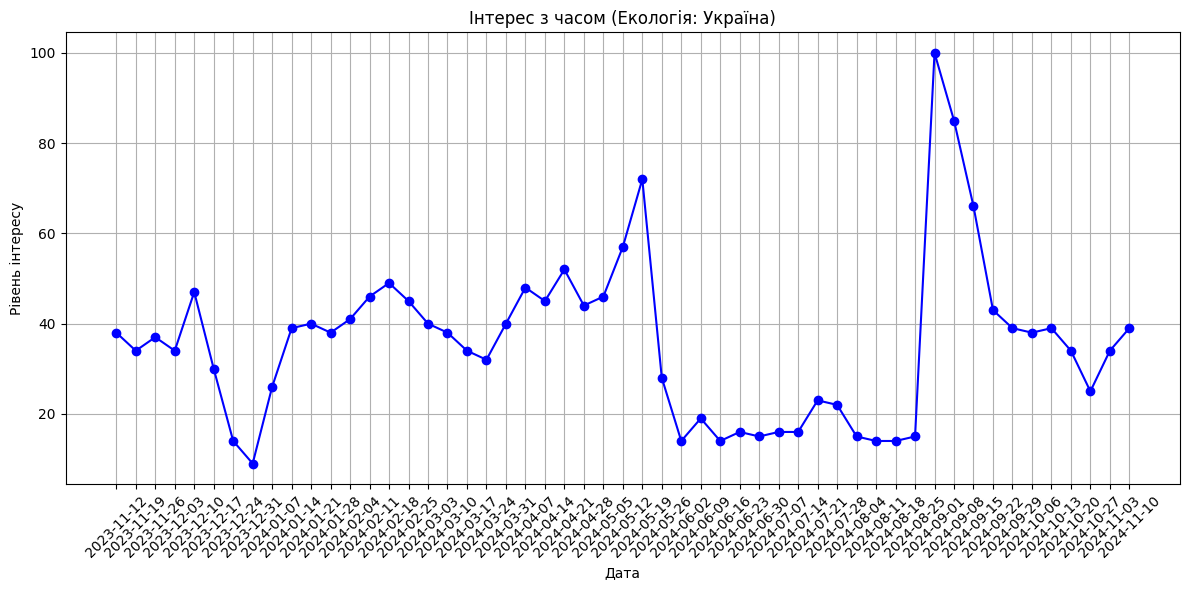

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(year_data["Date"], year_data["Trend"], marker='o', color='b', linestyle='-')
plt.title("Інтерес з часом (Екологія: Україна)")
plt.xlabel("Дата")
plt.ylabel("Рівень інтересу")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


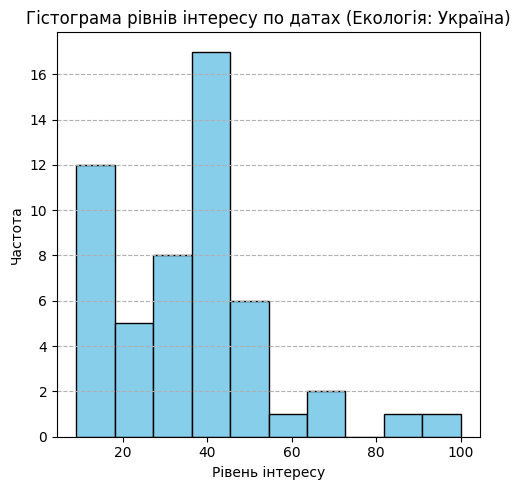

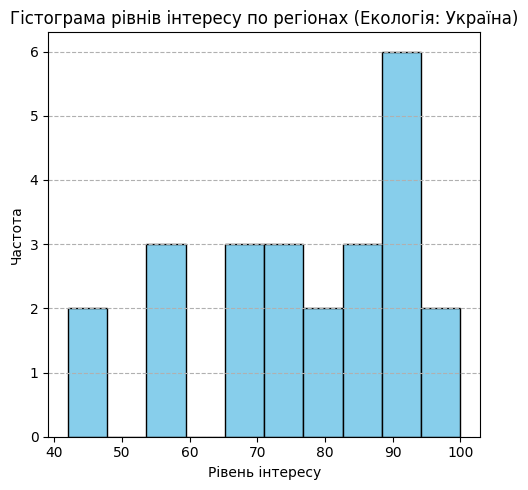

In [43]:
plt.figure(figsize=(5, 5))
plt.hist(year_data["Trend"], bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма рівнів інтересу по датах (Екологія: Україна)")
plt.xlabel("Рівень інтересу")
plt.ylabel("Частота")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(geo_data["Trend"], bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма рівнів інтересу по регіонах (Екологія: Україна)")
plt.xlabel("Рівень інтересу")
plt.ylabel("Частота")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


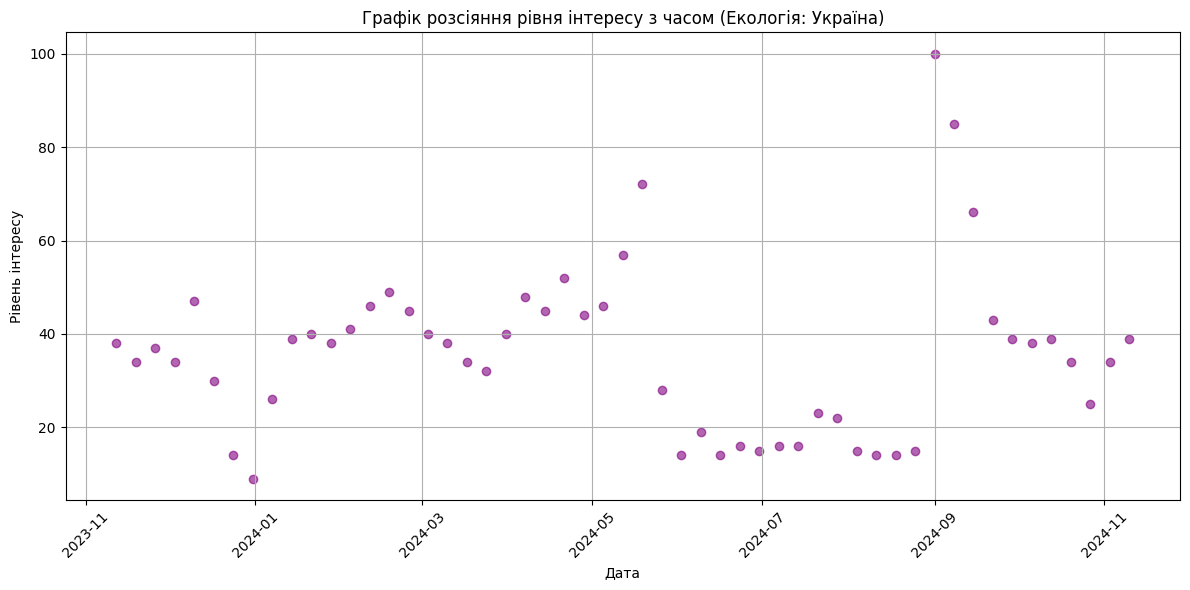

In [44]:
plt.figure(figsize=(12, 6))
plt.scatter(year_data["Date"], year_data["Trend"], color='purple', alpha=0.6)
plt.title("Графік розсіяння рівня інтересу з часом (Екологія: Україна)")
plt.xlabel("Дата")
plt.ylabel("Рівень інтересу")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


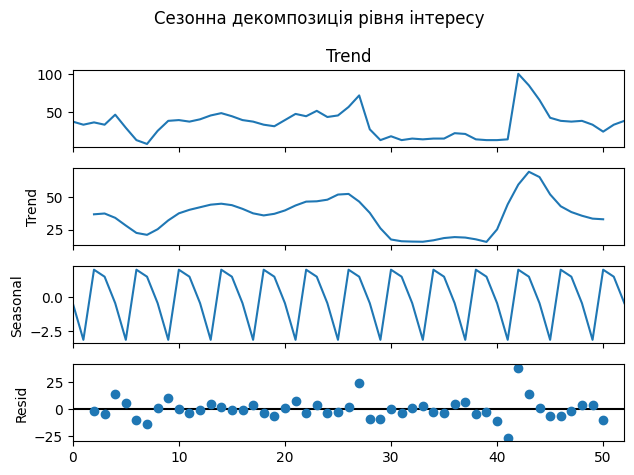

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(year_data["Trend"], model="additive", period=4) 
decomposition.plot()
plt.suptitle("Сезонна декомпозиція рівня інтересу")
plt.tight_layout()
plt.show()


Висновок: Графіки показують, що тренд є змінним, що вказує на вплив зовнішніх чинників на рівень інтересу. Сезонні коливання чітко прослідковуються, що свідчить про циклічний характер інтересу, з повтореннями, які можуть бути пов'язані з певними періодами або подіями.

In [46]:
year_data["Date"] = pd.to_datetime(year_data["Date"])

before_aug_25 = year_data[year_data["Date"] < '2024-08-25']
after_aug_25 = year_data[year_data["Date"] >= '2024-08-25']

before_april_21.head(), after_april_21.head()


(        Date  Trend
 0 2023-11-12     38
 1 2023-11-19     34
 2 2023-11-26     37
 3 2023-12-03     34
 4 2023-12-10     47,
          Date  Trend
 41 2024-08-25     15
 42 2024-09-01    100
 43 2024-09-08     85
 44 2024-09-15     66
 45 2024-09-22     43)

In [47]:
from scipy.stats import ttest_ind

mean_before = before_aug_25["Trend"].mean()
mean_after = after_aug_25["Trend"].mean()

# Виконання t-тесту
t_stat, p_value = ttest_ind(before_april_21["Trend"], after_april_21["Trend"], equal_var=False)

print(f"Середнє значення інтересу до 25 серпня: {mean_before}")
print(f"Середнє значення інтересу після 25 серпня: {mean_after}")
print(f"Статистика t-тесту: {t_stat}")
print(f"P-значення: {p_value}")


Середнє значення інтересу до 25 серпня: 32.707317073170735
Середнє значення інтересу після 25 серпня: 46.416666666666664
Статистика t-тесту: -1.8262613082798034
P-значення: 0.09026955343832299


Оскільки p-значення (0.9026) значно більше за 0.05, можна зробити висновок, що немає статистично значущої різниці між рівнем інтересу до "екології" до і після 21 березня. Це означає, що зміна середнього значення є ймовірно випадковою і не пов'язана з подією після цієї дати.